# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [183]:
%matplotlib inline
import os
import pandas as pd
import re
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

DATA_FOLDER = 'Data'

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [184]:
#paths for data folders
EBOLA_FOLDER = DATA_FOLDER + "/ebola"
GUINEA_FOLDER = EBOLA_FOLDER + "/guinea_data"
LIBERIA_FOLDER = EBOLA_FOLDER + "/liberia_data"
SIERRALEONE_FOLDER = EBOLA_FOLDER + "/sl_data"

Creating empty dataframe 'final_df' to combine all datasets for all countries.
This dataframe will hold the number of new cases and the cumulative number of deaths per day, for every country.

In [185]:
final_df_columns=["Date" , "Day", "Month", "Country" , "Number of new cases" , "Total number of deaths"]
final_df=pd.DataFrame(columns=final_df_columns)

For every country, we perform an exploratory step (specific to every country to account for the differences in file formats), where we look for inconsistencies such as reported totals that do not actually match the sum of subtotals or missing values. Based on these observations, we either add the totals (for new cases and deaths) to the final dataframe as they are given in the data files, or compute these totals from the values of the corresponding subcategories.

We look at the fields containing :

- new cases of suspects
- new cases of probables
- new cases of confirmed
- total new cases (if available)
- total deaths of suspects
- total deaths of probables
- total deaths of confirmed
- total deaths of (suspects + probables + confirmed) (if avaiable)

We ignore all other fields as none of them contain extra useful information for the task at hand. Note: the field names differ from country to another

#### Intermediate step for Guinea

We create the 'guinea_df' dataframe which represents a detailed daily summary of the ebola crisis in Guinea, taking into account all the files in the Guinea folder, and holding the different subcategories of new cases and deaths, as well as their totals.

In [186]:
guinea_columns=["Date", "Country", "New Cases of Suspects", "New Cases of Probables", "New Cases of Confirmed",
                "Total new Cases", "Total deaths of suspects", "Total deaths of probables", "Total deaths of confirmed",
                "Total deaths (suspects + probables + confirmed)", "Total new correct", "Total deaths correct"]
guinea_df=pd.DataFrame(columns=guinea_columns)

We then check, for every date, whether the reported total of new cases and the reported total of deaths correspond to the sum of the corresponding subcategories.

We notice that in some cases the totals do not match the sums. We decide to add the computed totals from the subcategories to the final dataframe (final_df) instead of the totals found in the data files because the available totals in the files did not make sense in some cases. For instance, the total deaths are supposed to be cumulative, however the total number of deaths for 2014-08-26 (958 deaths) is larger than the total number of deaths for 2014-08-27 (438 deaths).

In [187]:
#get all files in subfolder and iteratively append to Guinea dataframe 
guinea_files = [file for file in os.listdir(GUINEA_FOLDER) if not(file.startswith("."))]

for g_file in guinea_files:
    #read data from file
    raw_data=pd.read_csv(GUINEA_FOLDER + "/" + g_file)
    #parse date, day and month from file name
    date=g_file.split(".")[0]
    day=int(date.split("-")[2])
    month=date.split("-")[1]
    #read values for subcategories of new cases and total new cases from dataframe
    new_cases_suspects=float(raw_data.loc[raw_data["Description"] == "New cases of suspects"]["Totals"])
    new_cases_probables=float(raw_data.loc[raw_data["Description"] == "New cases of probables"]["Totals"])
    new_cases_confirmed=float(raw_data.loc[raw_data["Description"] == "New cases of confirmed"]["Totals"])
    total_new_cases=float(raw_data.loc[raw_data["Description"] == "Total new cases registered so far"]["Totals"])
    #read values for subcategories of total deaths and sum of total deaths from dataframe
    deaths_suspects=float(raw_data.loc[raw_data["Description"] == "Total deaths of suspects"]["Totals"])
    deaths_probables=float(raw_data.loc[raw_data["Description"] == "Total deaths of probables"]["Totals"])
    deaths_confirmed=float(raw_data.loc[raw_data["Description"] == "Total deaths of confirmed"]["Totals"])
    total_deaths=float(raw_data.loc[raw_data["Description"] == "Total deaths (confirmed + probables + suspects)"]["Totals"])
    
    #sum new cases
    sum_new_cases=0
    if (np.isnan(new_cases_suspects) & np.isnan(new_cases_probables) & np.isnan(new_cases_confirmed)):
        sum_new_cases=float('nan')
    else:
        sum_new_cases=np.nansum([new_cases_suspects, new_cases_probables, new_cases_confirmed])
    #sum deaths
    sum_deaths=0
    if(np.isnan(deaths_suspects) & np.isnan(deaths_probables) & np.isnan(deaths_confirmed)):
        sum_deaths=float('nan')
    else:
        sum_deaths=np.nansum([deaths_suspects, deaths_probables, deaths_confirmed])

    #check if totals match sum of subcategories (for new cases and for deaths)
    total_new_correct=1
    total_deaths_correct=1
    if (sum_new_cases != total_new_cases):
        total_new_correct=0
    if (sum_deaths != total_deaths):
        total_deaths_correct=0
    #add entry for that date to the Guinea dataframe
    guinea_df.loc[len(guinea_df)]=[date, "Guinea", new_cases_suspects, new_cases_probables, new_cases_confirmed, total_new_cases, deaths_suspects, deaths_probables, deaths_confirmed, total_deaths, total_new_correct, total_deaths_correct]
    
    #add entry in final dataframe by using computed totals from the subcategories 
    #instead of using the totals available in the data files.
    final_df.loc[len(final_df)]=[date, day, month,"Guinea" , sum_new_cases, sum_deaths]

This is the intermediate dataframe we obtain for Guinea:

In [188]:
print(guinea_df)

          Date Country  New Cases of Suspects  New Cases of Probables  \
0   2014-08-04  Guinea                    5.0                     0.0   
1   2014-08-26  Guinea                   18.0                     NaN   
2   2014-08-27  Guinea                   12.0                     0.0   
3   2014-08-30  Guinea                   15.0                     0.0   
4   2014-08-31  Guinea                    9.0                     8.0   
5   2014-09-02  Guinea                   11.0                     0.0   
6   2014-09-04  Guinea                   13.0                     0.0   
7   2014-09-07  Guinea                    5.0                     0.0   
8   2014-09-08  Guinea                    5.0                     0.0   
9   2014-09-09  Guinea                    9.0                     0.0   
10  2014-09-11  Guinea                    9.0                     0.0   
11  2014-09-14  Guinea                    0.0                    11.0   
12  2014-09-16  Guinea                    4.0      

#### Intermediate step for Liberia

We create the 'liberia_df' dataframe which represents a detailed daily summary of the ebola crisis in Liberia, taking into account all the files in the Liberia folder, and holding the different subcategories of new cases and deaths, as well as the totals for deaths, as the totals for new cases are not available in the files provided for Liberia.

In [189]:
liberia_columns=["Date", "Country", 'New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)', 
                 'Total death/s in suspected cases', 'Total death/s in probable cases' ,'Total death/s in confirmed cases',
                 'Total death/s in confirmed, probable, suspected cases', 'Total deaths correct']
liberia_df=pd.DataFrame(columns=liberia_columns)

We then check, for every date, whether the reported totals of deaths correspond to the sum of the subcategories for deaths.

We notice that in many cases, the values for the subcategories of deaths are missing in the provided files, while the value for the total of deaths is available. We decide to use the values of total deaths available in the files and add them to the final dataframe. For new cases, we sum up the values of the subcategories of new cases to obtain the total, since there is no total field in the data files.

In [190]:
#get all files in subfolder and iteratively append to Liberia dataframe
liberia_files = [file for file in os.listdir(LIBERIA_FOLDER) if not(file.startswith("."))]

for l_file in liberia_files:
    #read data from file
    raw_data=pd.read_csv(LIBERIA_FOLDER + "/" + l_file)
    #remove double spaces and line breaks that cause trouble when reading values
    raw_data['Variable'] = raw_data['Variable'].str.replace(' \n ', ' ')
    raw_data['Variable'] = raw_data['Variable'].str.replace(' +', ' ')
    #parse date, day and month from file name
    date="-".join(l_file.split("-")[0:3])
    date=date.split(".")[0]
    day=int(date.split("-")[2])
    month=date.split("-")[1]
    #read values for subcategories of new cases from dataframe
    new_cases_suspects=float(raw_data.loc[raw_data["Variable"] == 'New Case/s (Suspected)']["National"])
    new_cases_probables=float(raw_data.loc[raw_data["Variable"] == 'New Case/s (Probable)']["National"])
    new_cases_confirmed=float(raw_data.loc[raw_data["Variable"] == 'New case/s (confirmed)']["National"])
    #read values for subcategories of total deaths and sum of total deaths from dataframe
    #we take the mean because in some cases we have multiple entries for deaths
    deaths_suspects=np.floor(float(pd.Series.mean(raw_data.loc[raw_data["Variable"] == 'Total death/s in suspected cases']["National"])))
    deaths_probables=np.floor(float(pd.Series.mean(raw_data.loc[raw_data["Variable"] == 'Total death/s in probable cases']["National"])))
    deaths_confirmed=np.floor(float(pd.Series.mean(raw_data.loc[raw_data["Variable"] == 'Total death/s in confirmed cases']["National"])))
    total_deaths=np.floor(float(pd.Series.mean(raw_data.loc[raw_data["Variable"] == 'Total death/s in confirmed, probable, suspected cases']["National"])))
    
    #sum new cases
    sum_new_cases=0
    if (np.isnan(new_cases_suspects) & np.isnan(new_cases_probables) & np.isnan(new_cases_confirmed)):
        sum_new_cases=float('nan')
    else:
        sum_new_cases=np.nansum([new_cases_suspects, new_cases_probables, new_cases_confirmed])
    #sum deaths
    sum_deaths=0
    if(np.isnan(deaths_suspects) & np.isnan(deaths_probables) & np.isnan(deaths_confirmed)):
        sum_deaths=float('nan')
    else:
        sum_deaths=np.nansum([deaths_suspects, deaths_probables, deaths_confirmed])
    
    #check if number total deaths matches the sum of subcategories of deaths
    total_deaths_correct=1
    if (sum_deaths != total_deaths):
        total_deaths_correct=0
    #add entry for that date to the Liberia dataframe
    liberia_df.loc[len(liberia_df)]=[date, "Liberia", new_cases_suspects, new_cases_probables, new_cases_confirmed,  deaths_suspects, deaths_probables, deaths_confirmed, total_deaths, total_deaths_correct]
    
    #add entry in final dataframe by computing the total of new cases from subcategories of new cases
    #and by using the value of total deaths read from the data files
    final_df.loc[len(final_df)]=[date, day, month, "Liberia" , sum_new_cases, total_deaths]

This is the intermediate dataframe we obtain for Liberia:

In [191]:
print(liberia_df)

          Date  Country  New Case/s (Suspected)  New Case/s (Probable)  \
0   2014-06-16  Liberia                     2.0                    1.0   
1   2014-06-17  Liberia                     2.0                    0.0   
2   2014-06-22  Liberia                     5.0                    0.0   
3   2014-06-24  Liberia                     2.0                    0.0   
4   2014-06-25  Liberia                     4.0                    1.0   
5   2014-06-28  Liberia                     2.0                    6.0   
6   2014-06-29  Liberia                     0.0                    0.0   
7   2014-07-01  Liberia                     2.0                    0.0   
8   2014-07-02  Liberia                     1.0                    3.0   
9   2014-07-03  Liberia                     1.0                    2.0   
10  2014-07-07  Liberia                     0.0                    2.0   
11  2014-07-08  Liberia                     3.0                    0.0   
12  2014-07-10  Liberia               

#### Intermediate step for Sierra Leone

We create the 'sl_df' dataframe which represents a detailed daily summary of the ebola crisis in Sierra Leone, taking into account all the files in the Sierra Leone folder, and holding the different subcategories of new cases and deaths. In the Sierra Leone data files, there are no available totals for neither new cases nor deaths.

In [192]:
sl_columns=["Date", "Country", 'new_suspected', 'new_probable', 'new_confirmed', 'death_suspected', 'death_probable' ,
            'death_confirmed']
sl_df=pd.DataFrame(columns=sl_columns)

Since there are no totals given in the Sierra Leone data files for neither new cases nor deaths, we compute them from the available subcategories and add the computed totals to the final dataframe.

In [193]:
#get all files in subfolder and iteratively append to Liberia dataframe
sierraleone_files = [file for file in os.listdir(SIERRALEONE_FOLDER) if not(file.startswith("."))]

for sl_file in sierraleone_files:
    #read data from file
    raw_data=pd.read_csv(SIERRALEONE_FOLDER + "/" + sl_file)
    #parse date, day and month from file name
    date="-".join(sl_file.split("-")[0:3])
    date=date.split(".")[0]
    day=int(date.split("-")[2])
    month=date.split("-")[1]
    #read values for subcategories of new cases from dataframe
    new_cases_suspects=float(raw_data.loc[raw_data["variable"] == 'new_suspected']["National"])
    new_cases_probables=float(raw_data.loc[raw_data["variable"] == 'new_probable']["National"])
    new_cases_confirmed=float(raw_data.loc[raw_data["variable"] == 'new_confirmed']["National"])
    #read values for subcategories of deaths from dataframe
    deaths_suspects=float(raw_data.loc[raw_data["variable"] == 'death_suspected']["National"])
    deaths_probables=float(raw_data.loc[raw_data["variable"] == 'death_probable']["National"])
    deaths_confirmed=float(raw_data.loc[raw_data["variable"] == 'death_confirmed']["National"])
    #add entry for that date to the Liberia dataframe
    sl_df.loc[len(sl_df)]=[date, "Sierra Leone", new_cases_suspects, new_cases_probables, new_cases_confirmed,  deaths_suspects, deaths_probables, deaths_confirmed]
    
    #sum new cases
    sum_new_cases=0
    if (np.isnan(new_cases_suspects) & np.isnan(new_cases_probables) & np.isnan(new_cases_confirmed)):
        sum_new_cases=float('nan')
    else:
        sum_new_cases=np.nansum([new_cases_suspects, new_cases_probables, new_cases_confirmed])
    #sum deaths
    sum_deaths=0
    if(np.isnan(deaths_suspects) & np.isnan(deaths_probables) & np.isnan(deaths_confirmed)):
        sum_deaths=float('nan')
    else:
        sum_deaths=np.nansum([deaths_suspects, deaths_probables, deaths_confirmed])
        
    #add entry in final dataframe by using the computed total of new cases from subcategories of new cases
    #and by the computed total deaths from subcategories of deaths
    final_df.loc[len(final_df)]=[date, day, month,"Sierra Leone" , sum_new_cases, sum_deaths]

This is the intermediate dataframe we obtain for Sierra Leone:

In [194]:
print(sl_df)

           Date       Country  new_suspected  new_probable  new_confirmed  \
0    2014-08-12  Sierra Leone           10.0           1.0           11.0   
1    2014-08-13  Sierra Leone            3.0           1.0           15.0   
2    2014-08-14  Sierra Leone            0.0           2.0           13.0   
3    2014-08-15  Sierra Leone            6.0           1.0           10.0   
4    2014-08-16  Sierra Leone            3.0           0.0           18.0   
5    2014-08-17  Sierra Leone            1.0           0.0            2.0   
6    2014-08-18  Sierra Leone           40.0          15.0            5.0   
7    2014-08-19  Sierra Leone           16.0           3.0            9.0   
8    2014-08-20  Sierra Leone            1.0           0.0            4.0   
9    2014-08-21  Sierra Leone            0.0           0.0            9.0   
10   2014-08-22  Sierra Leone            1.0           0.0           56.0   
11   2014-08-23  Sierra Leone            4.0           0.0           23.0   

#### Combined data
Now the final dataframe combining data for all countries is complete (final_df). We display it below:

In [195]:
print(final_df)

           Date Day Month       Country  Number of new cases  \
0    2014-08-04   4    08        Guinea                  9.0   
1    2014-08-26  26    08        Guinea                 28.0   
2    2014-08-27  27    08        Guinea                 22.0   
3    2014-08-30  30    08        Guinea                 24.0   
4    2014-08-31  31    08        Guinea                 46.0   
5    2014-09-02   2    09        Guinea                 25.0   
6    2014-09-04   4    09        Guinea                 30.0   
7    2014-09-07   7    09        Guinea                 16.0   
8    2014-09-08   8    09        Guinea                 16.0   
9    2014-09-09   9    09        Guinea                 16.0   
10   2014-09-11  11    09        Guinea                 22.0   
11   2014-09-14  14    09        Guinea                 25.0   
12   2014-09-16  16    09        Guinea                 10.0   
13   2014-09-17  17    09        Guinea                 10.0   
14   2014-09-19  19    09        Guinea 

#### Calculation of daily average per month of new cases and deaths

We use the combined dataframe to get the daily average per month of new cases and deaths. For new cases, we consider that the number of new cases for each date correspond to the number of new cases that appeared that day. To get the daily average per month of new cases, we therefore take the average of the number of new cases for each month. As we do not have data files for all days of the month, the average we get is not 100% representative of the true daily average per month. However, we assume that the average obtained from the data that is available to us is close enough to the true daily average number of new cases per month.

For deaths, the number of total deaths we have in the final dataframe correspond to the cumulative number of deaths up to that day.

To get the daily average per month of deaths, we take the difference between the maximum number of deaths for each month and the minimum number of death for that month, and we divide by the number of days in between (max_day - min_day + 1) to obtain an estimate of the daily average deaths per month.

In [196]:
#sort by date to calculate daily average of deaths from cumulative values
sorted_df_bydate=final_df.sort_values("Date")
#group by country and month
grouped_df = sorted_df_bydate.groupby(["Country", "Month"])
#use grouped dataframe to calculate average of new cases, total number of deaths, 
#and total number of days + 1 for every month
intermediate_results = grouped_df.aggregate({"Number of new cases" : np.nanmean, 
                                             "Total number of deaths": lambda x: max(x) - min(x), 
                                             "Day": lambda x: max(x)  - min(x) + 1})
#renamecolumn for intermediate results dataframe
intermediate_results.columns=["Average daily number of new cases","Total monthly number of deaths", "Total number of days"]
                  
def get_avg_deaths(group):
    #function that calculates the average number of deaths in a months 
    #by dividing the total number of deaths in that month by the total number of days for which data is available
    total_deaths=group['Total monthly number of deaths']
    total_days=group['Total number of days']
    return total_deaths/total_days

#apply function to get daily average of deaths from intermediate_results dataframe
avg_deaths=intermediate_results.apply(get_avg_deaths, axis=1)
avg_deaths=avg_deaths.to_frame()
avg_deaths.columns=["Average daily number of deaths"]
avg_new_cases=intermediate_results[["Average daily number of new cases"]]
#joining daily average of new cases and daily average of deaths in a single dataframe (final_results)
final_results=avg_new_cases.join(avg_deaths)

Finally, we handle one special case for Guinea, where we only have data available for 1 day in month 10, more specifically only for the first day. For that case, we consider the last day of month 09 and deduct that value from the value available in the file for month 10. We consider this to be the daily average, although we realize it might not be 100% representative of the true daily average.

In [197]:
#handling case where we only have one file for month 10 in Guinea
value_end_09 = float(final_df.loc[(final_df["Date"] == "2014-09-30") & (final_df["Country"]=="Guinea")]["Total number of deaths"])
value_start_10=float(final_df.loc[(final_df["Date"] == "2014-10-01") & (final_df["Country"]=="Guinea")]["Total number of deaths"])
final_results.iloc[2, 1] = value_start_10 - value_end_09

The final results, grouped by country and month are displayed below:

In [198]:
print(final_results)

                    Average daily number of new cases  \
Country      Month                                      
Guinea       08                             25.800000   
             09                             19.625000   
             10                             34.000000   
Liberia      06                              5.714286   
             07                              8.545455   
             08                             37.222222   
             09                             63.833333   
             10                             45.560000   
             11                             26.466667   
             12                           5825.875000   
Sierra Leone 08                             27.944444   
             09                             43.703704   
             10                             70.928571   
             11                             83.157895   
             12                             68.333333   

                    Average da

### Note: 
We notice that the average daily number of new cases in Liberia for month 11 is abnormally high. After checking the files relative to month 12 in Liberia, we notice that the number of new cases for Liberia for that month are indeed abnormally high. This could be due to incorrect data entry.

### Note: 
We also thought about another approach for calculating the daily agerages per month for new cases.

In fact, given that the new_cases attributes were not cumulative in any country, we decided to compute the averages the way we did: get the new cases numbers from the available data at hand and compute the average from it. However, the new cases data is a bit sparse, since a good number of their values are missing (NaN), and in Guinea for example, data is available only for a few days per month (< 10), so the average might not always be very meaningful and really representative of the new cases situation in Guinea.

Another approach would be to use the total_cases attribute (instead of new_cases) since total_cases is a cumulative field, and we would compute the daily average per month in the following way: average = (total_cases at last day available of month - total_cases at first day available of month) / (last day of month - first day of month + 1).

That way, we would be benefiting from the cumulative nature of the total_cases attribute and we would get rid of the sparisty problem of new_cases attribute in Guinea.

But, at the end, we thought about doing it the way we did because it is the best (and safest) we could do with the available (but scarce) data at hand, and because we found a lot of inconsistencies in the total_cases attribute (e.g. total_cases might be higher sometimes in the middle of the month, rather than the end thus contradicting the cumulative nature of the field), but also because we are not sure that our assumption that new_cases for month j = (total_cases at month (j+1) - total_cases at month j) is actually correct (in other words, we are not sure if the total_cases and new_cases fields are correlated at all).

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

First, we import the metadata file into one dataframe df_metadata, for later use

In [199]:
df_metadata = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls")

In [200]:
#This df_list is a list of dataframe objects, in which we will be appending dataframes (as seen below)
df_list = []

In [201]:
#We have 9 data files (other than the metadata). We will be looping over them
for i in range(1,10):
    #This is the path of the i'th file
    xls_path = DATA_FOLDER + "/microbiome/MID" + str(i) + ".xls"

    #We import the i'th MID file into a dataframe (df_MID) with no header (there is no existing header in any xls file)
    df_MID = pd.read_excel(xls_path, header=None)

    #Then, we add the two columns 'Group' and 'Sample' to the newly created data frame.
    #Looking at the data, we can deduce that we can link all the entries in the MIDi file with the labels
    #of the GROUP and SAMPLE columns in the metadata file, that have BARCODE MIDi. So, these 2 newly-added columns
    #will have the same value for all rows of the dataframe, and these values actually correspond to the (i-1)'th row values
    #in the metadata dataframe
    df_MID['Group'] = df_metadata.GROUP[i-1]
    df_MID['Sample'] = df_metadata.SAMPLE[i-1]

    #Next, we set the names of the first two columns to 'Name' and 'Value' while also setting the order
    #of the columns in the i'th dataframe (as shown below)
    df_MID.columns = ['Name', 'Value', 'Group', 'Sample']

    #Then, we replace all the "NaN" entries in the data frame by the label "unknow", as requested
    df_MID = df_MID.fillna("unknown")

    #Next, we want the index of this dataframe to be unique. First, we tried the (Name, Group) pair as unique index,
    #but it doesn't work! In fact, all the files have common names, but also some share the Group names as well,
    #So, the next logical potentially unique index to be considered is the (Name, Group, Sample) triplet. It actually works!
    #In fact, this can be checked in the metadata file since not one pair of MID files having the same Group label
    #also share the Sample label => the index is then unique (will be checked below as well)

    #Note: by making sure that each individual dataframe has unique index, we are also sure that the resulting 
    #aggregate dataframe (concatenation of all single dataframes) will also have a unique index
    df_indexed = df_MID.set_index(['Name', 'Group', 'Sample'])

    #Finally, we append the newly indexed dataframe to the list of dataframes
    df_list.append(df_indexed)

Now, we build the combined dataframe, using simple concatenation of the uniquely indexed dataframes in df_list

In [202]:
df_aggregate = df_list[0]
for i in range(1, 9):
    df_aggregate = pd.concat([df_aggregate, df_list[i]])

Here, we are printing a small visual sample of the aggregate dataframe to make sure what we did is correct.

In [203]:
print(df_aggregate.head())

                                                                               Value
Name                                               Group              Sample        
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... EXTRACTION CONTROL unknown      7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc... EXTRACTION CONTROL unknown      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal... EXTRACTION CONTROL unknown      3
Archaea "Crenarchaeota" Thermoprotei Thermoprot... EXTRACTION CONTROL unknown      3
Archaea "Euryarchaeota" "Methanomicrobia" Metha... EXTRACTION CONTROL unknown      7


Finally, we make sure that the aggregate dataframe is uniquely indexed.

In [204]:
print(df_aggregate.index.is_unique)

True


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [205]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We first import the libraries that will be used in this problem.

Now, we import the data from 'titanic.xls' to the dataframe df_titanic, and then print the head of the dataframe as a visual preview of df_titanic.

In [206]:
df_titanic = pd.read_excel(DATA_FOLDER + "/titanic.xls", converters={'pclass': np.int, 'survived': np.int, 'age': np.float})
print(df_titanic.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

      age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0      29      0      0   24160  211.3375       B5        S    2    NaN   
1  0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2       2      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3      30      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4      25      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis,

# Answers

### 1)

For every attribute present in the data file, we will describe it in terms of type and value range, and then discuss the possibility of making it a categorical attribute.

pclass: 
- meaning: class of passenger
- type: int64
- values: 1, 2 and 3
- range: (1, 3)
- categorical: Yes, because it takes only 3 values: 1, 2 and 3

In [207]:
pclass = df_titanic['pclass']
print(pclass.describe())
df_titanic['pclass'] = df_titanic.pclass.astype('category')

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: pclass, dtype: float64


survived: 
- meaning: did the passenger survive?
- type: int64
- values: 0 and 1
- range: (0, 1)
- categorical: Yes, because it takes only 2 values: 0 and 1

In [208]:
survived = df_titanic['survived']
print(survived.describe())
df_titanic['survived'] = df_titanic.survived.astype('category')

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64


sex: 
- meaning: gender of passenger
- type: object
- values_range: male and female
- categorical: Yes, because it takes only 2 values: male and female

In [209]:
sex = df_titanic['sex']
print(sex.describe())
df_titanic['sex'] = df_titanic.sex.astype('category')

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object


cabin: 
- meaning: cabin of passenger
- type: object
- number of values: a lot (187)
- categorical: theoretically Yes, because the cabin attribute has a finite number of discrete values => can be categorical. However, there are a lot of sub-categories (187, so maybe not worth it in our problem) and these sub-categories are not perfectly defined because some of them are a combination of several cabin numbers, and not just one (but at least the sub-categories are disjoint => could be categorical).

Note: maybe a better categorical attribute would be the cabin floor (not present in data) instead of the cabin attribute itself: it has less values and the sub-categories can be well defined (take the leftmost character of every cabin entry as the cabin floor of that entry)

In [210]:
cabin = df_titanic['cabin']
print(cabin.describe())
#df_titanic['cabin'] = df_titanic.cabin.astype('category')

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object


embarked: 
- meaning: the port at which the passenger embarked
- type: object
- values_range: C, Q and S
- categorical: Yes, because it takes only 3 values: C, Q and S

In [211]:
embarked = df_titanic['embarked']
print(embarked.describe())
df_titanic['embarked'] = df_titanic.embarked.astype('category')

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object


boat: 
- meaning: boat the passenger took
- type: object
- number of values: 28 (quite a few)
- categorical: No, there are quite a few sub-categories (28, so maybe not worth it in our problem) and these sub-categories are not well defined because some of them are a combination of several boat numers, and not just one (so the sub-categories would not be disjoint => does not make much sense). e.g: 13, (13, 15), and (13, 15, B) are all subcategories.

In [212]:
boat = df_titanic['boat']
print(boat.describe())

count     486
unique     28
top        13
freq       39
Name: boat, dtype: object


Name: 
- meaning: name of the passenger
- type: object
- number of values: 1307 distinct names out of 1309 passengers
- categorical: No, a person's name cannot be a categorical feature, it has way many possibilities with very few repetitions

In [213]:
name = df_titanic['name']
print(name.describe())

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: name, dtype: object


Age: 
- meaning: age of the passenger
- type: float64
- number of values: 98 distinct values
- categorical: No, a person's age cannot be a categorical feature, it has a wide range of values (age is a numerical feature) and a lot of age entries are missing
- We count 263 missing values, that we will not consider in our plots

In [214]:
age = df_titanic['age']
print(age.describe())

count     1046.0
unique      98.0
top         24.0
freq        47.0
Name: age, dtype: float64


sibsp: 
- meaning: number of Siblings/Spouses Aboard
- type: float64
- number of values: 7 distinct values
- categorical: No, it is a numerical feature (it could be categorized given the small range of distinct values it can take, but it doesn't make much sense for this attribute to be categorical)

In [215]:
sibsp = df_titanic['sibsp']
print(sibsp.describe())
sibsp.value_counts()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64


0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

parch: 
- meaning: number of Parents/Children Aboard
- type: float64
- number of values: 8 distinct values
- categorical: No, it is a numerical feature (it could be categorized given the small range of distinct values it can take, but it doesn't make much sense for this attribute to be categorical)

In [216]:
parch = df_titanic['parch']
print(parch.describe())
parch.value_counts()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64


0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: int64

ticket: 
- meaning: ticket number of passenger
- type: object
- number of values: 939 distinct values
- categorical: No, it is a feature that could be numerical, alphabetical or both! Too many possibilites (939 unique values)

In [217]:
ticket = df_titanic['ticket']
print(ticket.describe())
#ticket.value_counts()

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object


fare: 
- meaning: fare of passenger
- type: float64
- number of values: 281 distinct values
- categorical: No, it is a numerical feature with a wide range of values (281)

In [218]:
fare = df_titanic['fare']
print(fare.describe())
#fare.value_counts()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


body: 
- meaning: body identification number
- type: float64
- number of values: 121 distinct values (for 121 persons), so it has non-repeating values
- categorical: No, it is a non-repeating numerical feature with a wide range of values (121)

In [219]:
body = df_titanic['body']
print(body.describe())
#body.value_counts()

count    121.000000
mean     160.809917
std       97.696922
min        1.000000
25%       72.000000
50%      155.000000
75%      256.000000
max      328.000000
Name: body, dtype: float64


home.dest: 
- meaning: home/destination of passenger
- type: object
- number of values: 369 distinct values
- categorical: No, it is a pair of strings with a wide range spanning 369 values (it could be theoretically categorical since it not numerical but it doesn't make much sense for this attribute to be categorical given the 369 unique values it can take)

In [220]:
home_dest = df_titanic['home.dest']
print(home_dest.describe())
#home_dest.value_counts()

count              745
unique             369
top       New York, NY
freq                64
Name: home.dest, dtype: object


We finally print again the head of the dataframe as a visual preview of df_titanic, after having made some attributes categorical.

In [221]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2)

#### Age:
For age, we use discrete decade intervals. But first, we have to get the min age and max age so that we know how to construct these intervals.

In [222]:
print(age.min())
print(age.max())

0.1667
80.0


The max age is 80 and min age is 0.1667, so it makes sense to take the discrete decade intervals in the following way:
[0, 10, 20, 30, 40, 50, 60, 70, 80]

Note: We know that the occurence of age 0.1667 is a mistake, but we will keep that value since it will not affect our answers (in particular this one and answer 6) since this value 0.1667 will be included in the intervals [0, 10] (this question) and [0, 28] (question 6) and will not be treated as an individual value.

(20, 30]    290
(0, 10]     220
(10, 20]    179
(30, 40]    159
(40, 50]    111
(50, 60]     59
(60, 70]     23
(70, 80]      5
Name: age, dtype: int64

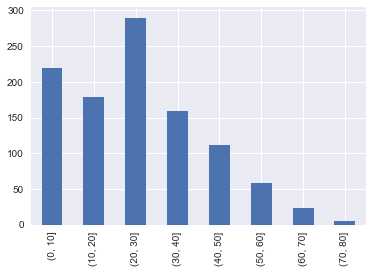

In [223]:
age_new = pd.cut(age, [0,10,20,30,40,50,60,70,80]) #discrete decade intervals
#Plot histogram
age_new.value_counts().sort_index().plot(kind='bar')
age_new.value_counts()

Note: There are a lot if missing values (as we previously mentioned), but they are not represented in this histogram. In fact, this histogram only shows the "known" ages of passengers, i.e. 1046 passengers out of 1309.

#### Sex:

male      843
female    466
Name: sex, dtype: int64

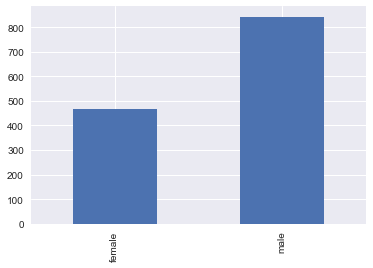

In [224]:
#Plot histogram
sex.value_counts().sort_index().plot(kind='bar')
sex.value_counts()

#### Travel Class:

3    709
1    323
2    277
Name: pclass, dtype: int64

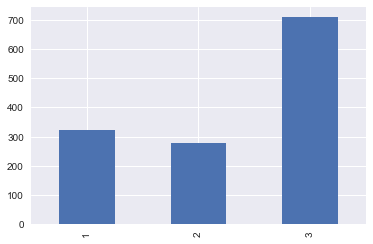

In [225]:
#Plot histogram
pclass.value_counts().sort_index().plot(kind='bar')
pclass.value_counts()

#### Embarkation Port:

S    914
C    270
Q    123
Name: embarked, dtype: int64

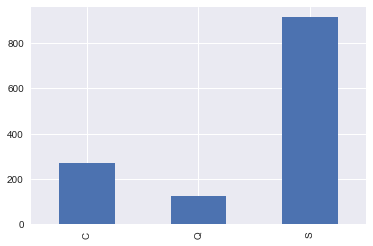

In [226]:
#Plot histogram
embarked.value_counts().sort_index().plot(kind='bar')
embarked.value_counts()

### 3)

We are required to present the proportion of passengers by cabin floor in a pie chart.
However, we should note that there are a lot of missing values (NaN) in the 'cabin' column (we only have 295 non-missing entries out of 1309).

So, to have a "meaningful" pie chart, we must exclude these missing entries and stick to the cabin floors that we know (i.e. not missing).

Now, let us explain how to extract the floor from the data present in the 'cabin' column. In fact, after quickly scanning the data (and relying on logic), we can see that no passenger had cabins starting with different letters (i.e. not on the same floor).
So, we considered the floor to be the first letter of whatever string sequence is present in the 'cabin' column.
e.g. cabin A32 is on floor A.

Note: There are some cabins which have two letters in their name, but we still assume that the first occuring letter is actually the cabin floor, e.g. cabin F E46 is on floor E.

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: cabin, dtype: int64

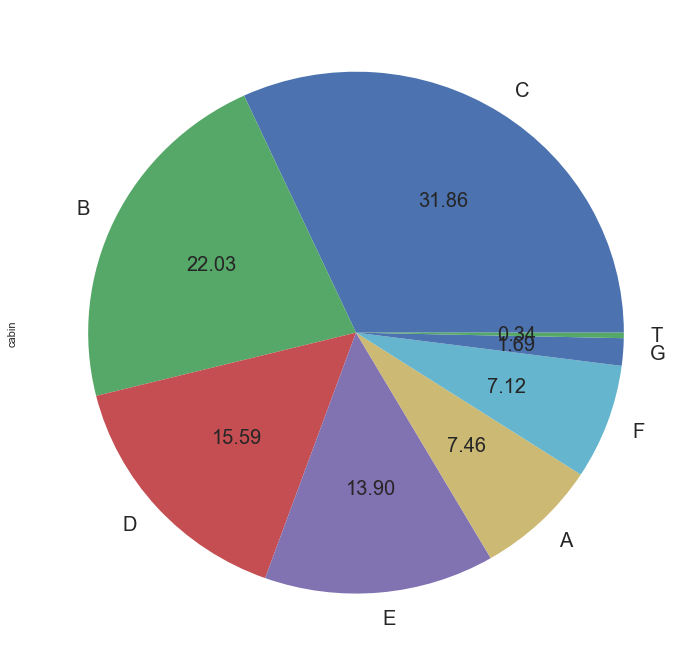

In [227]:
#Reduce the cabin series by dropping all missing entries (NaN)
cabin_reduce = cabin.dropna()
#Consider (for every entry) the floor to be the first character of the string sequence present in the column 'cabin'
cabin_floor = cabin_reduce.astype(str).str[0]
#Plot pie chart
cabin_floor.value_counts().plot(kind='pie', autopct='%.2f', fontsize=20, figsize=(12, 12))
#Make sure results are correct
cabin_floor.value_counts()

As we have previously mentioned, this pie chart accounts only for 295 passengers (1014 missing values). Therefore, we must note that the results we got are not very meaningful and should not be considered to be representative of the overall distribution of passengers by cabin floor.

### 4)

We are required to calculate the proportion of the passengers that survived for each travel class, and then present the results in three pie charts (one per class).

So, we basically just build the series pclass1_survived, which really is just the 'survived' column of only the passengers that were in travel class 1. To do so, we used the (.loc) method (as shown below), and then plotting the results in a pie chart is straight forward.

Same applies for classes 2 and 3.

1    200
0    123
Name: survived, dtype: int64


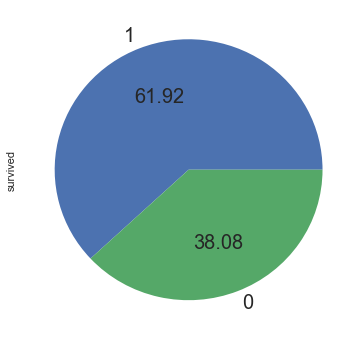

In [228]:
#Consider only the passengers in class 1: we only include the 'survived' attribute of passengers in class 1,
#and then combine them into a series called pclass1_survived
pclass1_survived = df_titanic.loc[df_titanic['pclass'] == 1, 'survived']
#These are the survival numbers of the passengers in class 1: 1 => has survived, 0 => has not survived
print(pclass1_survived.value_counts())
#Plot pie chart
pclass1_survived.value_counts().plot(kind='pie', autopct='%.2f', fontsize=20, figsize=(6, 6))

0    158
1    119
Name: survived, dtype: int64


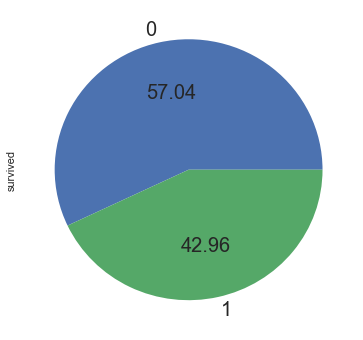

In [229]:
#Consider only the passengers in class 2: we only include the 'survived' attribute of passengers in class 2,
#and then combine them into a series called pclass2_survived
pclass2_survived = df_titanic.loc[df_titanic['pclass'] == 2, 'survived']
#These are the survival numbers of the passengers in class 2: 1 => has survived, 0 => has not survived
print(pclass2_survived.value_counts())
#Plot pie chart
pclass2_survived.value_counts().plot(kind='pie', autopct='%.2f', fontsize=20, figsize=(6, 6))

0    528
1    181
Name: survived, dtype: int64


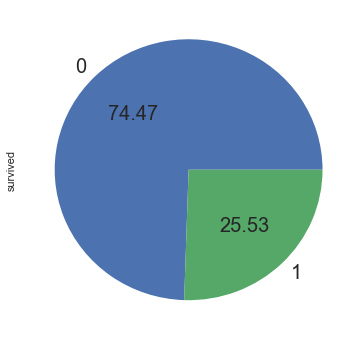

In [230]:
#Consider only the passengers in class 3: we only include the 'survived' attribute of passengers in class 3,
#and then combine them into a series called pclass3_survived
pclass3_survived = df_titanic.loc[df_titanic['pclass'] == 3, 'survived']
#These are the survival numbers of the passengers in class 3: 1 => has survived, 0 => has not survived
print(pclass3_survived.value_counts())
#Plot pie chart
pclass3_survived.value_counts().plot(kind='pie', autopct='%.2f', fontsize=20, figsize=(6, 6))

The three pie charts above show the strong correlation between the travel class of passengers and their survial rates. In fact, it is clear that as the travel class becomes more and more cheap and affordable, the survival rates increase (as expected). First class has the highest survival rate of 61.92% (good), but we can notice the difference with second class where the survival rate dropped to 42.96%. Finally, the third class clearly proves our previous point (strong correlation between travel class and survial rates), as the survival rate significantly drops to 25.53%, which is considered pretty low (compared to 61.92%).

### 5)

We are required to calculate the proportion of the passengers that survived by travel class and sex, and then present our results in a single histogram.

This was very easy to do using sns.barplot(), as shown below.

However, to show that the histogram displays correct values, we proceeded in the following way:
- We created the dataframe df_titanic_survived, which has the entries of the total dataframe df_titanic that have the 'survived'attribute set to 1 (df_titanic_survived basically comprises all survivors)
- We created a groupby object titanic_class_sex_obj, by which we group entries in the newly created dataframe df_titanic_survived by sex and travel class, as requested
- We describe titanic_class_sex_obj['survived'] and look at the 'count' column, and check that it is consistent with the values provided in the histogram

count  unique  top  freq
sex    pclass                          
female 1         139       1    1   139
       2          94       1    1    94
       3         106       1    1   106
male   1          61       1    1    61
       2          25       1    1    25
       3          75       1    1    75

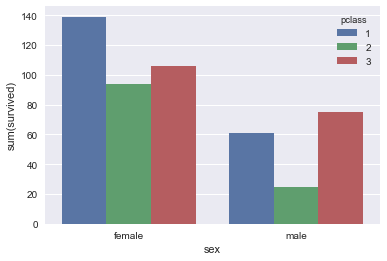

In [231]:
#This is a temporary dataframe that is only used to plot the histogram (and also partly in question 6).
#The way we built the original dataframe df_titanic is not appropriate for the way we are plotting the histogram
#(using sns.barplot())
df_titanic_temp = pd.read_excel(DATA_FOLDER + "/titanic.xls")

#Plot histogram
sns.barplot(x="sex", y="survived", hue="pclass", data=df_titanic_temp, estimator=sum, ci=None)

#Make sure the results of the histogram are correct
df_titanic_survived = df_titanic.loc[df_titanic['survived'] == 1]
titanic_class_sex_obj = df_titanic_survived.groupby(['sex','pclass'])
titanic_class_sex_obj['survived'].describe()

It is clear from our results that a woman is much more likely to survive than a man, for any class.

### 6)

We are required to create 2 (approximately) equally populated age categories and then calculate survival proportions by age category, travel class and sex. Then, we present our results in a DataFrame with unique index.

To create two equally populated age categories, it is obvious that we must look at the median value of the 'age' attribute.

In [232]:
#Get the median
age_median = df_titanic_temp['age'].median()
print(age_median)
#age.value_counts()

28.0


If we print the age value counts, we can see that there are 32 occurences of the median in the data, i.e. 32 people had 28 years old at that time. So, it means that one of these 32 occurences is actually the median, but we don't know which one.
Also, to get meaningful age categories, people with the same age should belong to the same category. Therefore, all these 32 occurences of the median will be included in the same category, making the two categories (that we will create) not equally populated anymore.

However, a small difference in the sizes of the age categories is acceptable (as mentioned on Mattermost). But to make sure that the categories are as much equal in size as possible, we tried including the median in category 1 (age1 <= 28 and age2 > 28) at first, and we got a difference of 26 in the sizes.

In [233]:
age_category1 = df_titanic_temp.loc[df_titanic_temp['age'] <= age_median, 'age']
age_category2 = df_titanic_temp.loc[df_titanic_temp['age'] > age_median, 'age']
print(len(age_category1))
print(len(age_category2))

536
510


Then, we included the median in category 2 (age1 < 28 and age2 >= 28), and we got a difference of 38 in the sizes.

In [234]:
age_category1 = df_titanic_temp.loc[df_titanic_temp['age'] < age_median, 'age']
age_category2 = df_titanic_temp.loc[df_titanic_temp['age'] >= age_median, 'age']
print(len(age_category1))
print(len(age_category2))

504
542


So, the first approach we took was more appropriate, and the two age categories we created were the following:
- Category 1: age <= median (28), with a size of 536
- Category 2: age > median (28), with a size of 510

In [235]:
#These are the two categories we created
categories = pd.cut(df_titanic_temp.age, [0,age_median,80], labels=['category1','category2'])
print(categories.value_counts())

category1    536
category2    510
Name: age, dtype: int64


We now populate the values of 'age' column of df_titanic with these newly created categories, depending on the age value. Then, we print the head of df_titanic dataframe, to show how the 'age' attribute got populated with the category1 and category2 labels.

Note: The previously missing values are still considered missing (NaN), and we did not give them any of the two labels category1 or category2 (as expected). 

In [236]:
df_titanic_temp.age = categories
df_titanic_temp.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,category2,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,category1,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,category1,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,category2,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,category1,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We then group the df_titanic dataframe entries by age, sex and travel class (as required), and obtain the titanic_class_sex_age object, as described below.

In [237]:
titanic_class_sex_age = df_titanic_temp.groupby(['age', 'sex','pclass'])
print(titanic_class_sex_age.describe())

                         body                                                \
                        count        mean         std    min     25%    50%   
age       sex    pclass                                                       
category1 female 1        0.0         NaN         NaN    NaN     NaN    NaN   
                 2        0.0         NaN         NaN    NaN     NaN    NaN   
                 3        3.0  226.666667  151.097099   53.0  176.00  299.0   
          male   1        3.0  183.000000   43.714986  148.0  158.50  169.0   
                 2       10.0  173.100000  108.223483   18.0   98.00  131.5   
                 3       21.0  149.523810  109.755009    1.0   67.00  131.0   
category2 female 1        0.0         NaN         NaN    NaN     NaN    NaN   
                 2        1.0   52.000000         NaN   52.0   52.00   52.0   
                 3        4.0  150.250000  144.723587    7.0   47.50  133.5   
          male   1       32.0  160.937500   85.59278

By looking at the previous description of titanic_class_sex_age, we noticed that what we are really interested in is the mean column of the 'survived' part of the description.

Note: the mean column of the 'survived' attribute is what we are looking for in that case, because since 'survived' only takes 0 and 1 values, its mean over all the passengers is actually a survival rate (a percentage).

So, we set our final dataframe (the one in which we need to calculate survival proportions by age category, travel class and sex) to be the 'mean' column of the 'survived' portion of titanic_class_sex_age, which happens to be actually a uniquely indexed dataframe (as can be checked below)!

In [238]:
df_final = titanic_class_sex_age.survived.mean()
print(df_final)
print(df_final.index.is_unique)

age        sex     pclass
category1  female  1         0.951220
                   2         0.910714
                   3         0.513761
           male    1         0.531250
                   2         0.216216
                   3         0.183036
category2  female  1         0.967391
                   2         0.872340
                   3         0.372093
           male    1         0.302521
                   2         0.083333
                   3         0.144000
Name: survived, dtype: float64
True
